In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [3]:
IMAGE_SIZE = 256
CHANNELS = 3

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'dataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
)

Found 1721 images belonging to 3 classes.


In [32]:
train_generator.class_indices

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [33]:
class_names = list(train_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [34]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break

[[[0.56740415 0.55563945 0.6223061 ]
  [0.57130224 0.56221235 0.6208547 ]
  [0.56459516 0.556752   0.611654  ]
  ...
  [0.55270284 0.5448597  0.5997617 ]
  [0.5535595  0.54571635 0.6006183 ]
  [0.5544161  0.546573   0.60147494]]

 [[0.56697583 0.5552111  0.6218778 ]
  [0.5708739  0.5613557  0.621283  ]
  [0.56588006 0.5580369  0.6129389 ]
  ...
  [0.5259541  0.51447475 0.5693767 ]
  [0.51867294 0.5063369  0.5612389 ]
  [0.51139176 0.49819908 0.55310106]]

 [[0.5665475  0.5547828  0.6214495 ]
  [0.5704456  0.5604991  0.6217113 ]
  [0.56716496 0.5593218  0.6142238 ]
  ...
  [0.50993776 0.49425146 0.54915345]
  [0.51464915 0.49896282 0.55386484]
  [0.5193605  0.5036742  0.55857617]]

 ...

 [[0.76548135 0.75371665 0.7811676 ]
  [0.75648695 0.74472225 0.7721732 ]
  [0.7474925  0.7357278  0.76317877]
  ...
  [0.6402123  0.6284476  0.6558986 ]
  [0.6509804  0.6392157  0.6666667 ]
  [0.63018084 0.61841613 0.6458671 ]]

 [[0.7172848  0.7055201  0.7329711 ]
  [0.7198546  0.7080899  0.73554087]


In [35]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'dataset/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 215 images belonging to 3 classes.


In [36]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 216 images belonging to 3 classes.


In [39]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.71348023 0.7056371  0.7566175 ]
  [0.71107745 0.7032343  0.7542147 ]
  [0.7238846  0.71604145 0.76702183]
  ...
  [0.65095925 0.6431161  0.6940965 ]
  [0.6489477  0.6411046  0.69208497]
  [0.64693624 0.6390931  0.6900735 ]]

 [[0.71750325 0.7096601  0.7606405 ]
  [0.7097364  0.70189327 0.75287366]
  [0.72120255 0.7133594  0.76433986]
  ...
  [0.64941984 0.6415767  0.6925571 ]
  [0.65277237 0.64492923 0.6959096 ]
  [0.65612483 0.6482817  0.69926214]]

 [[0.72152627 0.7136831  0.7646635 ]
  [0.7083954  0.7005523  0.7515327 ]
  [0.7185206  0.71067744 0.76165783]
  ...
  [0.66514266 0.6572995  0.70827997]
  [0.66648364 0.6586405  0.7096209 ]
  [0.6678246  0.6599815  0.7109619 ]]

 ...

 [[0.6764168  0.6646521  0.6921031 ]
  [0.65831333 0.6465486  0.6739996 ]
  [0.6402098  0.6284451  0.65589607]
  ...
  [0.57472366 0.56295896 0.6060962 ]
  [0.6216245  0.6098598  0.6529971 ]
  [0.6157499  0.6039852  0.64712244]]

 [[0.650213   0.6384483  0.6658993 ]
  [0.671669   0.6599043  0.6873553 ]


<h1>Building the Model</h1>

In [13]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

c:\Personal_Ansh\DS\PotatoDisease\pdis\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

<h1>Compiling the Model</h1>

- We use adam Optimizer, SparseCategoricalCrossentropy for losses, accuracy as a metric

In [15]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [17]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=10,
)

Epoch 1/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.4968 - loss: 0.9455 - val_accuracy: 0.4531 - val_loss: 0.8960
Epoch 2/10
 7/47 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.4796 - loss: 0.8878

c:\Personal_Ansh\DS\PotatoDisease\pdis\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


47/47 ━━━━━━━━━━━━━━━━━━━━ 14s 289ms/step - accuracy: 0.5084 - loss: 0.8741 - val_accuracy: 0.4688 - val_loss: 0.8788
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 74s 2s/step - accuracy: 0.6077 - loss: 0.7653 - val_accuracy: 0.7188 - val_loss: 0.5353
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 14s 273ms/step - accuracy: 0.7960 - loss: 0.4708 - val_accuracy: 0.8021 - val_loss: 0.4180
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step - accuracy: 0.8446 - loss: 0.3726 - val_accuracy: 0.8698 - val_loss: 0.4973
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 14s 279ms/step - accuracy: 0.8340 - loss: 0.3830 - val_accuracy: 0.8750 - val_loss: 0.3320
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step - accuracy: 0.8891 - loss: 0.2713 - val_accuracy: 0.8646 - val_loss: 0.3367
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 14s 283ms/step - accuracy: 0.8941 - loss: 0.2795 - val_accuracy: 0.8698 - val_loss: 0.3189
Epoch 9/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 0.9051 - loss: 0.2415 - val_accuracy: 0.9167 - val_loss

In [18]:
scores = model.evaluate(test_generator)

7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.8989 - loss: 0.1843


In [19]:
scores

[0.16850262880325317, 0.9120370149612427]

<h1>Plotting the Accuracy and Loss Curves</h1>

In [20]:
history

In [21]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 47}

In [22]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [23]:

type(history.history['loss'])

list

In [24]:
len(history.history['loss'])

10

In [25]:
history.history['loss'][:5]

[0.9019314050674438,
 0.871669590473175,
 0.6442260146141052,
 0.4784068763256073,
 0.36146214604377747]

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [27]:
val_acc

[0.453125,
 0.46875,
 0.71875,
 0.8020833134651184,
 0.8697916865348816,
 0.875,
 0.8645833134651184,
 0.8697916865348816,
 0.9166666865348816,
 0.9010416865348816]

In [28]:
acc

[0.5036740303039551,
 0.5133928656578064,
 0.6941489577293396,
 0.7880184054374695,
 0.8436873555183411,
 0.8348214030265808,
 0.8904475569725037,
 0.8973214030265808,
 0.913827657699585,
 0.9419642686843872]

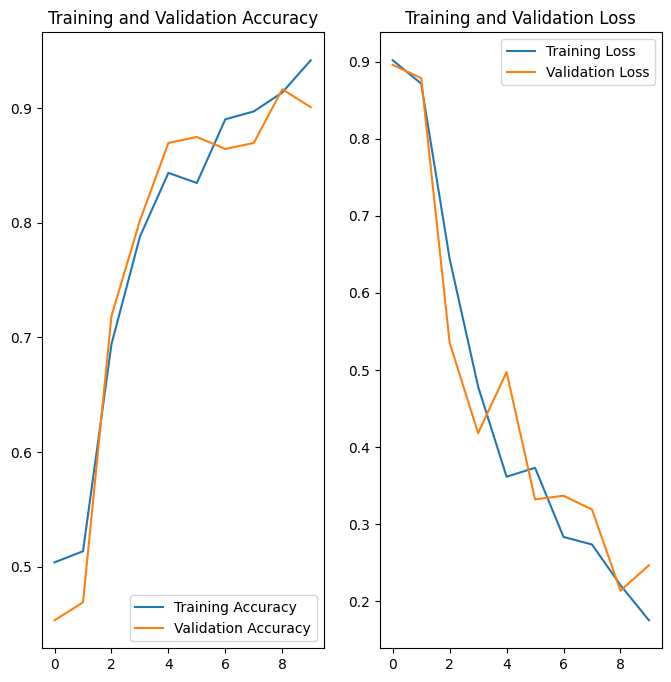

In [29]:
EPOCHS = 10

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 747ms/step
predicted label: Potato___Late_blight


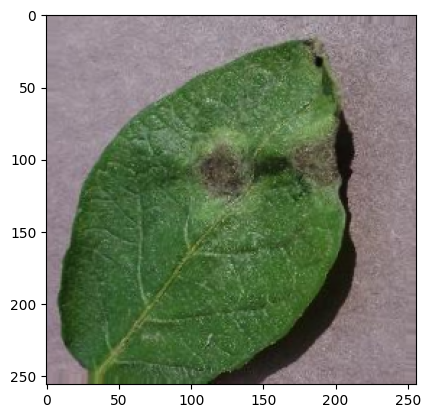

In [42]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

<h3>Write a function for inference</h3>

In [43]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

<h4>Now run inference on few sample images</h4>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


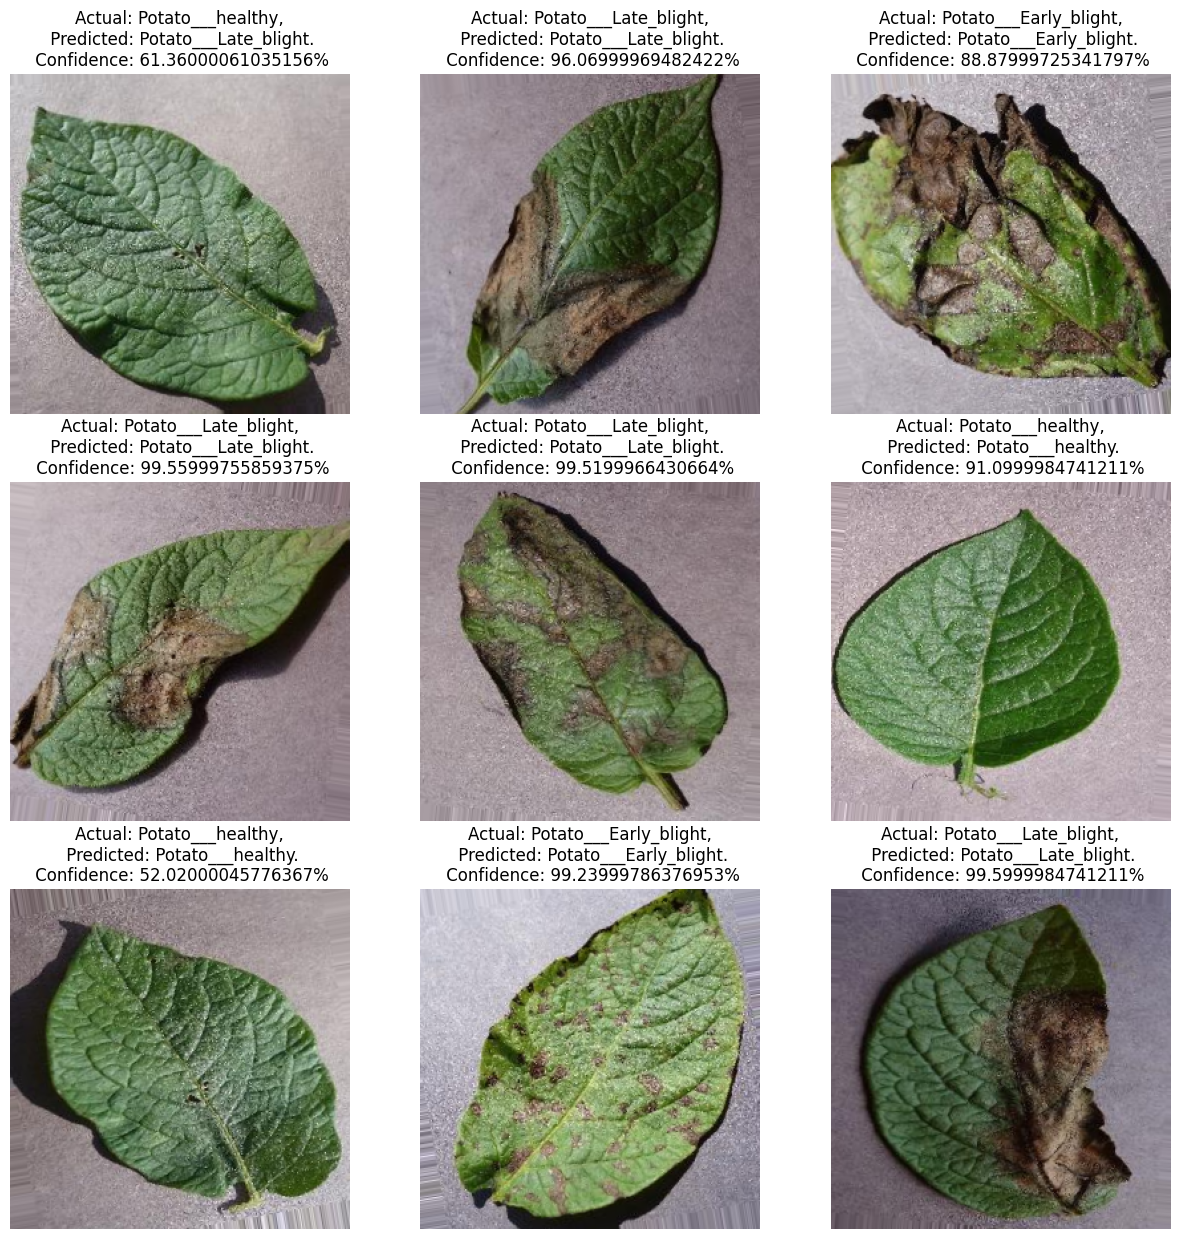

In [44]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [45]:
model.save("../potatoes.h5")